# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


In [2]:
df = pd.read_csv("50_Startups.csv")

In [16]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
df.shape

(108, 5)

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


In [9]:
df.corr().Profit.sort_values(ascending=False)

<ipython-input-9-417a10a64466>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Profit.sort_values(ascending=False)


Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
Name: Profit, dtype: float64

#Handling Null Values


In [8]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [10]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
df.State.nunique()

3

In [12]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

# Data Visualization

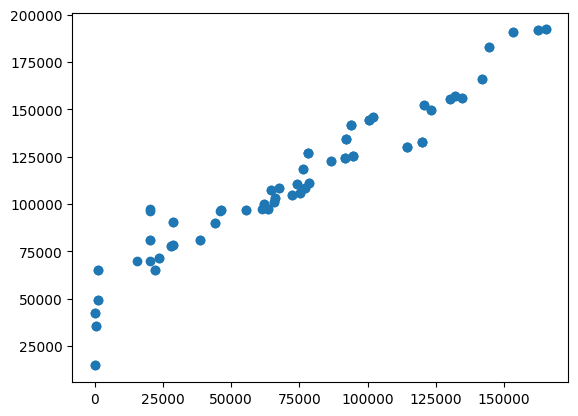

In [14]:
plt.scatter(df["R&D Spend"],df["Profit"])

<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

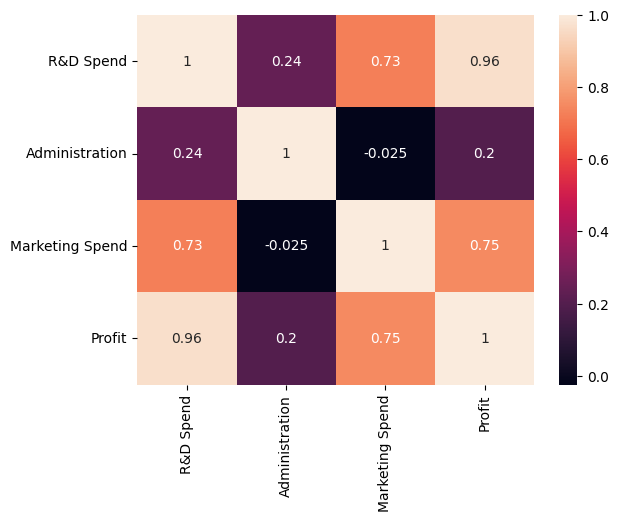

In [17]:
sns.heatmap(df.corr(),annot=True)

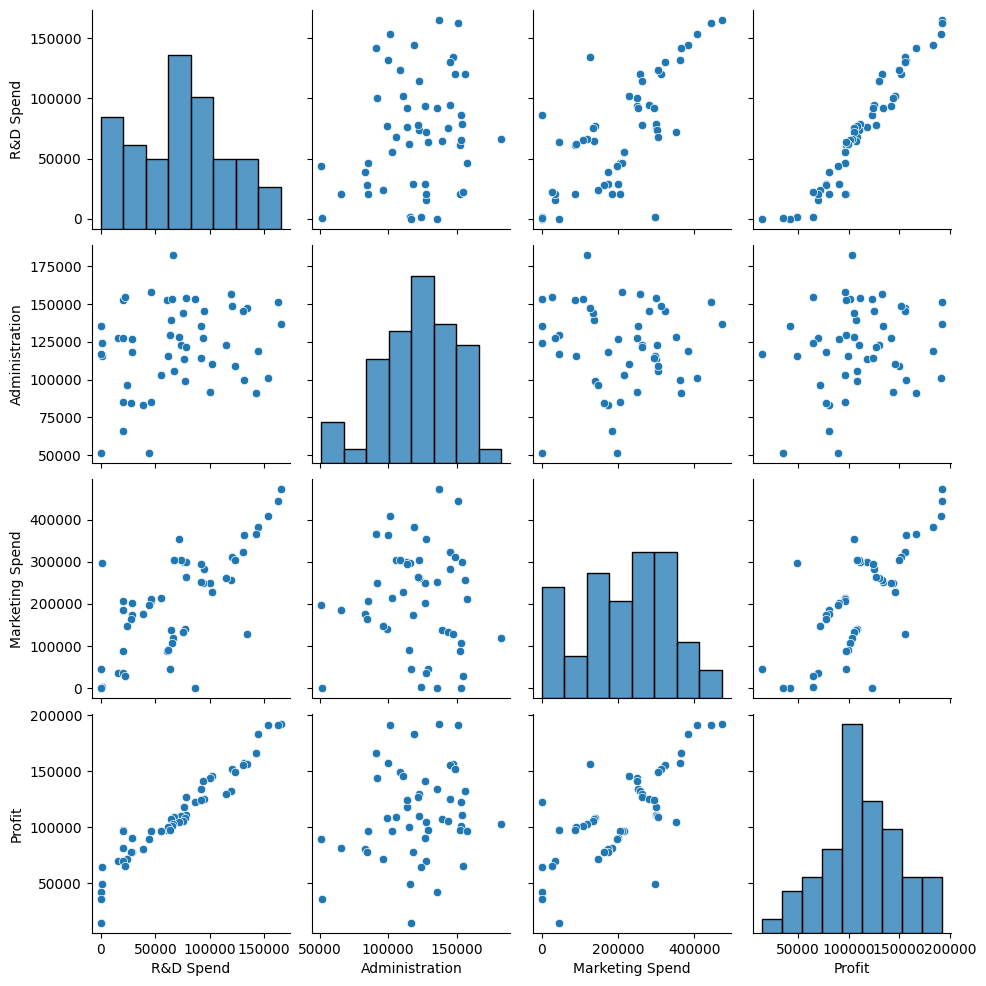

In [18]:
sns.pairplot(df)

<ipython-input-19-3c0bcad0f787>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x=df["State"],y=df["Profit"],ci=0)


<Axes: xlabel='State', ylabel='Profit'>

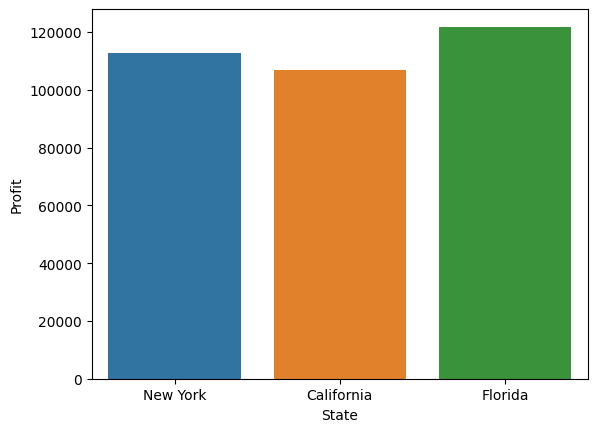

In [19]:
sns.barplot(x=df["State"],y=df["Profit"],ci=0)

# Outlier Detection


<Axes: >

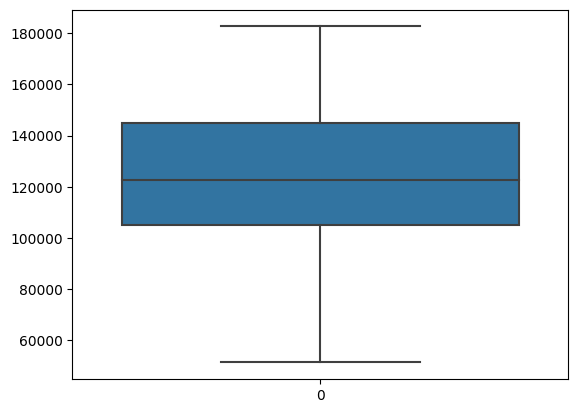

In [20]:
sns.boxplot(df["Administration"])

<Axes: >

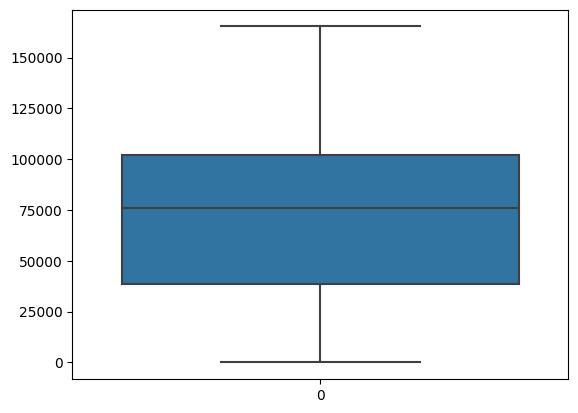

In [21]:
sns.boxplot(df["R&D Spend"])

# Splitting The Dataset

In [22]:
X=df.drop(columns=["Profit"],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [23]:
y=df["Profit"]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [24]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
X["State"]=le.fit_transform(X["State"])
X['State']

0      2
1      0
2      1
3      2
4      1
      ..
103    1
104    2
105    0
106    2
107    1
Name: State, Length: 108, dtype: int64

In [29]:
# print(le.classes_)
# print(dict(zip(le.classes_,range(len(le.classes_)))))

[0 1 2]
{0: 0, 1: 1, 2: 2}


# Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [34]:
X_Scaled=pd.DataFrame(ms.fit_transform(X),columns=X.columns)

In [35]:
X_Scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,1.000000,0.651744,1.000000,1.0
1,0.983359,0.761972,0.940893,0.0
2,0.927985,0.379579,0.864664,0.5
3,0.873136,0.512998,0.812235,1.0
4,0.859438,0.305328,0.776136,0.5


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size =0.2,random_state =0)

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=lr.predict(x_test)

In [42]:
y_pred

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [43]:
y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

In [45]:
profit=pd.DataFrame({"Actual_profit":y_test,"Predicted _profit":y_pred})
profit

,Actual_profit,Predicted _profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [48]:
print(lr.predict(ms.transform([[165349.20,136897.80,471784.10,2]])))

[193329.17668167]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Metrics


In [49]:
from sklearn import metrics

In [50]:
print(metrics.r2_score(y_test,y_pred))

0.9258962347553817


In [51]:
print(metrics.mean_squared_error(y_test,y_pred)) #MSE

96015241.54707709


In [52]:
# RMSE (Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

9798.736732205693
